# CREDIT CARD FRAUD DETECTION

In [110]:
#import liberary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [111]:
#load the data set 
data = pd.read_csv("creditcard.csv")

###  Explore the dataset

In [112]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [114]:
# Check for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [115]:
# Distribution of legit and fraud transactions as 0 & 1 respectivelly
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

We find that the dataset is highly unbalanced.

In [87]:
# seperating the data for analysis
legit = data[data.Class ==0]
fraud = data[data.Class ==1]

In [88]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [89]:
#stastical measure of the data 
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [90]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [91]:
# compare the value for both transaction
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-sampleing the dataset

In [92]:
#Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions
legit_sample = legit.sample(n=492)

In [93]:
# Concatenating two DataFrames

new_data = pd.concat([legit_sample, fraud], axis=0)

In [94]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
95982,65550.0,-0.958168,0.437034,0.897084,0.426843,-1.025085,-0.246482,1.135057,0.241639,-0.488516,...,0.033027,-0.263230,0.482058,0.418871,0.152681,0.216745,-0.198552,-0.025756,243.66,0
16075,27498.0,-1.466223,0.818573,2.974108,1.800395,-0.096006,0.639643,0.057119,0.315775,0.008680,...,0.164884,0.611602,-0.325770,0.426519,0.486102,0.096770,-0.371300,0.172754,1.52,0
250064,154707.0,2.055257,-0.048778,-1.063135,0.407263,-0.102428,-1.126989,0.175826,-0.314711,0.524678,...,-0.282762,-0.666641,0.346514,-0.010477,-0.309668,0.200817,-0.066722,-0.060435,0.89,0
173938,121705.0,2.379289,-1.184887,-1.857241,-2.036288,-0.180737,-0.006634,-0.827041,-0.198880,-1.943374,...,0.058405,0.643510,-0.054367,-0.304463,0.261726,0.079793,-0.016446,-0.072462,15.00,0
96737,65911.0,-0.344605,1.120729,1.286690,0.064480,0.003501,-0.974844,0.727352,-0.071489,-0.387175,...,-0.262333,-0.694590,-0.004490,0.331888,-0.161373,0.071933,0.243846,0.098362,7.74,0


In [95]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

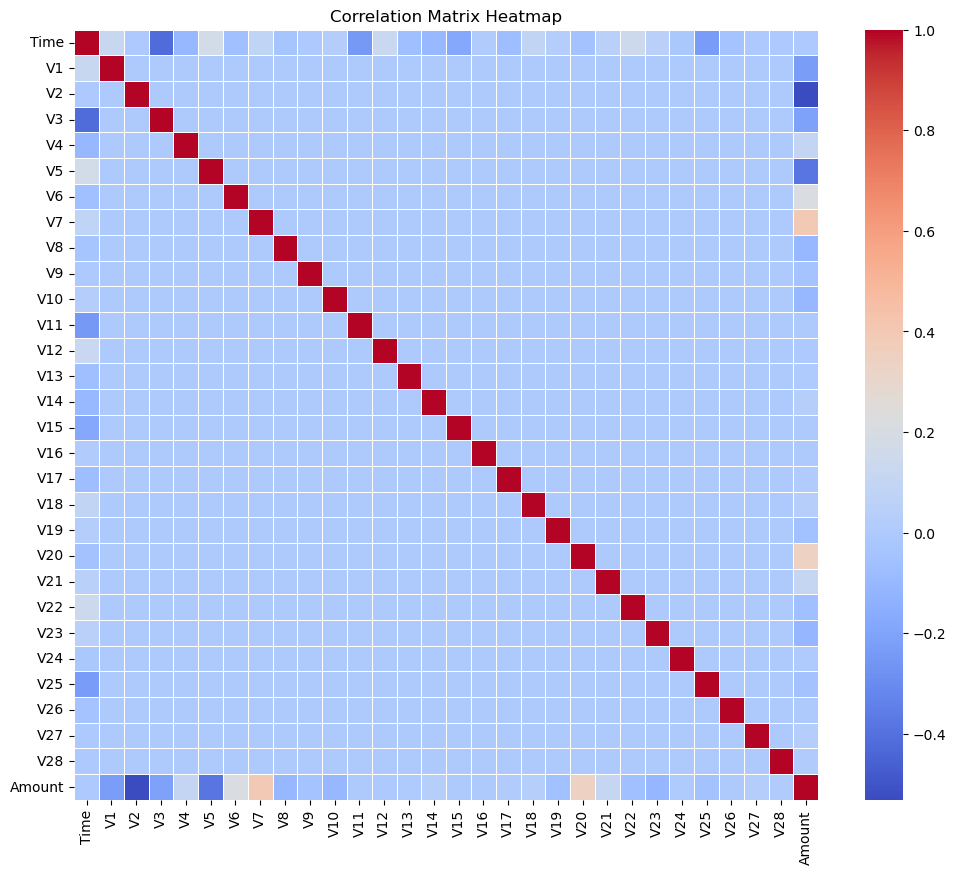

In [116]:
correlation_data = data.drop(columns=['Class'])

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [96]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97151.247967,-0.090712,0.113587,-0.005534,-0.080350,-0.050558,-0.058771,-0.000752,-0.035218,0.055002,...,-0.027570,0.015815,0.002245,-0.036118,0.017486,0.013237,0.009450,0.029326,-0.004758,83.630447
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [97]:
# Split the data into feature and target
x = new_data.drop('Class', axis=1)
y = new_data['Class']

In [98]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
95982    65550.0 -0.958168  0.437034  0.897084  0.426843 -1.025085 -0.246482   
16075    27498.0 -1.466223  0.818573  2.974108  1.800395 -0.096006  0.639643   
250064  154707.0  2.055257 -0.048778 -1.063135  0.407263 -0.102428 -1.126989   
173938  121705.0  2.379289 -1.184887 -1.857241 -2.036288 -0.180737 -0.006634   
96737    65911.0 -0.344605  1.120729  1.286690  0.064480  0.003501 -0.974844   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [99]:
print(y)

95982     0
16075     0
250064    0
173938    0
96737     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [100]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [101]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


## Model Training- LogisticRegression

In [102]:
model = LogisticRegression( max_iter=1000)  


In [103]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation

In [104]:
# Calculate accuracy on the training data
x_train_prediction = model.predict(x_train)
train_data_accuracy = accuracy_score(x_train_prediction, y_train)
print(f"Accuracy on Training Data: {train_data_accuracy:.2f}")

# Calculate precision on the training data
train_data_precision = precision_score(y_train, x_train_prediction)
print(f"Precision on Training Data: {train_data_precision:.2f}")

# Calculate recall on the training data
train_data_recall = recall_score(y_train, x_train_prediction)
print(f"Recall on Training Data: {train_data_recall:.2f}")

# Calculate F1-score on the training data
train_data_f1 = f1_score(y_train, x_train_prediction)
print(f"F1-Score on Training Data: {train_data_f1:.2f}")

Accuracy on Training Data: 0.95
Precision on Training Data: 0.96
Recall on Training Data: 0.93
F1-Score on Training Data: 0.95


In [105]:
# Calculate accuracy on the test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print(f"Accuracy on Test Data: {test_data_accuracy:.2f}")

# Calculate precision on the test data
test_data_precision = precision_score(y_test, x_test_prediction)
print(f"Precision on Test Data: {test_data_precision:.2f}")

# Calculate recall on the test data
test_data_recall = recall_score(y_test, x_test_prediction)
print(f"Recall on Test Data: {test_data_recall:.2f}")

# Calculate F1-score on the test data
test_data_f1 = f1_score(y_test, x_test_prediction)
print(f"F1-Score on Test Data: {test_data_f1:.2f}")

Accuracy on Test Data: 0.93
Precision on Test Data: 0.93
Recall on Test Data: 0.93
F1-Score on Test Data: 0.93


In [106]:
# Make predictions on your training data
y_train_pred = model.predict(x_train)

# Calculate the confusion matrix
confusion = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:")
print(confusion)

# Generate and print a classification report
class_report = classification_report(y_train, y_train_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[379  14]
 [ 28 366]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       393
           1       0.96      0.93      0.95       394

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787

